# Finding Out The Actual Cause For Breaking Of Machines In Company!!!

In [1]:
### Importing some useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Fetching data from the given url 

In [2]:
url="https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/maintenance_data.csv"

### Reading Content of the data

In [3]:
df=pd.read_csv(url)
df

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1
...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,TeamB,Provider4
996,88,1,116.727075,110.871332,95.075631,TeamA,Provider4
997,22,0,104.026778,88.212873,83.221220,TeamB,Provider1
998,78,0,104.911649,104.257296,83.421491,TeamA,Provider4


# Data Values Entered in rows and columns

In [4]:
df.shape

(1000, 7)

# Data Information 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
lifetime          1000 non-null int64
broken            1000 non-null int64
pressureInd       996 non-null float64
moistureInd       1000 non-null float64
temperatureInd    997 non-null float64
team              1000 non-null object
provider          1000 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [5]:
#checking for unique values present(if any)
df['team'].unique()

array(['TeamA', 'TeamC', 'TeamB'], dtype=object)

In [17]:
#checking for unique values present(if any)
df['provider'].unique()

array(['Provider4', 'Provider1', 'Provider2', 'Provider3'], dtype=object)

# Statistical form of data(Summary)

In [9]:
df.describe()

,lifetime,broken,pressureInd,moistureInd,temperatureInd
count,1000.000000,1000.000000,996.000000,1000.000000,997.000000
mean,55.195000,0.397000,98.681100,111.088723,100.553499
std,26.472737,0.489521,19.879703,41.839005,19.592059
min,1.000000,0.000000,33.481917,70.928815,42.279598
25%,34.000000,0.000000,85.562282,94.532547,87.672094
50%,60.000000,0.000000,97.311091,102.844084,100.528015
75%,80.000000,1.000000,112.253190,113.532970,113.522496
max,93.000000,1.000000,173.282541,1156.493254,172.544140


In [15]:
df

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1
...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,TeamB,Provider4
996,88,1,116.727075,110.871332,95.075631,TeamA,Provider4
997,22,0,104.026778,88.212873,83.221220,TeamB,Provider1
998,78,0,104.911649,104.257296,83.421491,TeamA,Provider4


In [8]:
# Finding and removing out the highest value among all which is making a greater difference in percentile of the data
df=df[df.moistureInd<=df.moistureInd.quantile(0.999)]
df.shape

(999, 7)

In [9]:
df.moistureInd.quantile(0.999)

197.04941336126015

In [10]:
df.describe()

,lifetime,broken,pressureInd,moistureInd,temperatureInd
count,999.000000,999.000000,995.000000,999.000000,996.000000
mean,55.170170,0.396396,98.683688,110.042272,100.556923
std,26.474343,0.489394,19.889532,25.614438,19.601604
min,1.000000,0.000000,33.481917,70.928815,42.279598
25%,34.000000,0.000000,85.562281,94.529427,87.643085
50%,60.000000,0.000000,97.321050,102.841390,100.544758
75%,80.000000,1.000000,112.254272,113.437037,113.545936
max,93.000000,1.000000,173.282541,199.138717,172.544140


# The Process Of Data Cleaning

In [17]:
# check for duplicate values
df.duplicated().sum()

0

In [5]:
#for checking null values present(if any)
df.isnull().sum()

lifetime          0
broken            0
pressureInd       4
moistureInd       0
temperatureInd    3
team              0
provider          0
dtype: int64

### pressureInd have 4 index with null value
### temperatureInd have 3 index with null value

In [16]:
#checking of skewness at every columns
df.skew()

lifetime         -0.405939
broken            0.424245
pressureInd       0.118152
moistureInd       1.588525
temperatureInd   -0.069946
dtype: float64

In [12]:
# since skewness is less than -0.1 therefore we will use mean to fill the null values
df.fillna(df.temperatureInd.mean(),inplace=True)

In [13]:
# since skewness is more than 0.1 therefore we will use median to fill the null values
df.fillna(df.pressureInd.median(),inplace=True)

In [18]:
# checking again for null value
df.isnull().sum()

lifetime          0
broken            0
pressureInd       0
moistureInd       0
temperatureInd    0
team              0
provider          0
dtype: int64

# Explorative Data Analysis

In [19]:
df.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1


#### Report looks Good for now

# Bivariate Scope for Data Analysis

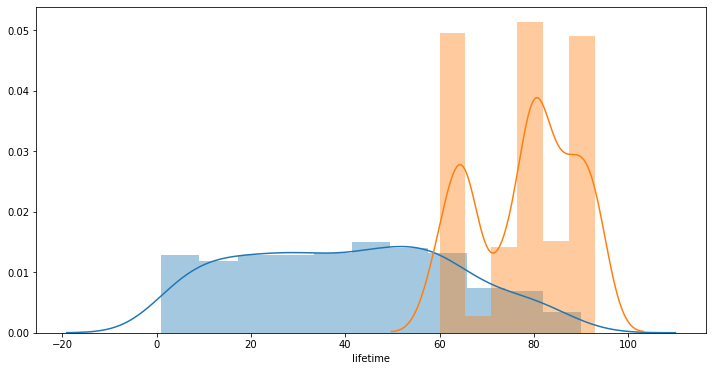

In [32]:
# Numeric vs Categorical
# lifetime vs broken
plt.figure(figsize=(12,6))
sns.distplot(df.lifetime[df.broken==0])
sns.distplot(df.lifetime[df.broken==1])
plt.show()

In [ ]:
# Statistically speaking, a histogram is a non-parametric estimation and its shape reflects the distribution of data.
# Since broken and not broken distribution are not similar.
# We can assume that machines after longer period of service more likely to be effected.

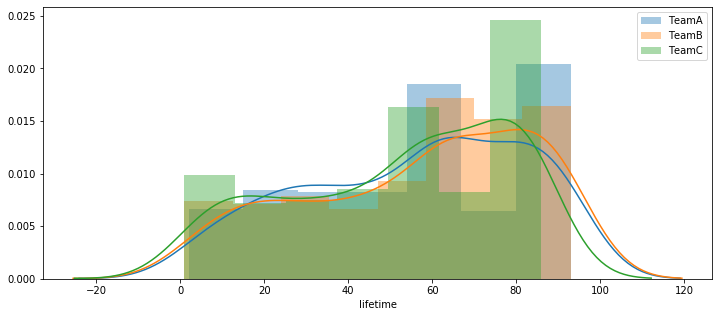

In [20]:
# Numeric vs Categorical
# lifetime vs team
plt.figure(figsize=(12,5))
sns.distplot(df.lifetime[df.team=='TeamA'])
sns.distplot(df.lifetime[df.team=='TeamB'])
sns.distplot(df.lifetime[df.team=='TeamC'])
plt.legend(['TeamA','TeamB','TeamC'])
plt.show()

In [ ]:
# Statistically speaking, a histogram is a non-parametric estimation and its shape reflects the distribution of data.
# Since lifetime and team distribution are quite similar, so we cannot infer anything.

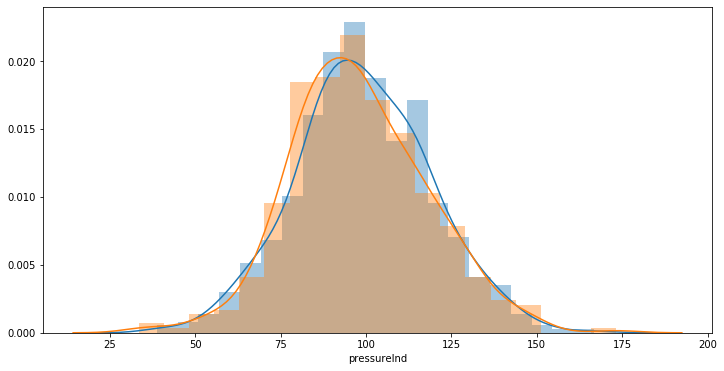

In [33]:
# Numeric vs Categorical
# pressureInd vs broken
plt.figure(figsize=(12,6))
sns.distplot(df.pressureInd[df.broken==0])
sns.distplot(df.pressureInd[df.broken==1])
plt.show()

In [ ]:
# Statistically speaking, a histogram is a non-parametric estimation and its shape reflects the distribution of data.
# since broken and not broken distribution are quite similar.
# Therefore, we can assume pressure is not the factor which affect's the machine as much.

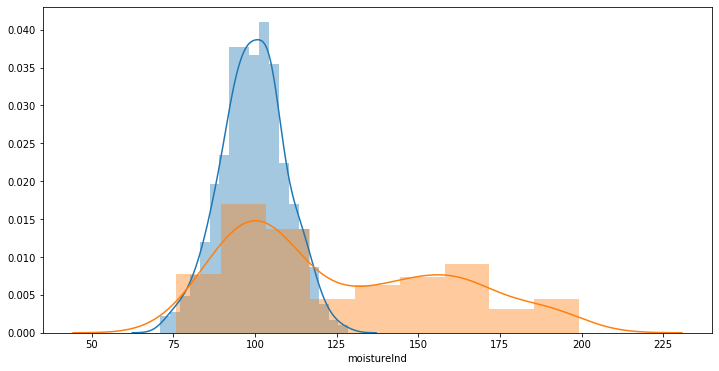

In [21]:
# Numeric vs Categorical
# moistureInd vs broken
plt.figure(figsize=(12,6))
sns.distplot(df.moistureInd[df.broken==0])
sns.distplot(df.moistureInd[df.broken==1])
plt.show()

In [ ]:
# Statistically speaking, a histogram is a non-parametric estimation and its shape reflects the distribution of data.
# Since broken and not broken distribution are not similar.

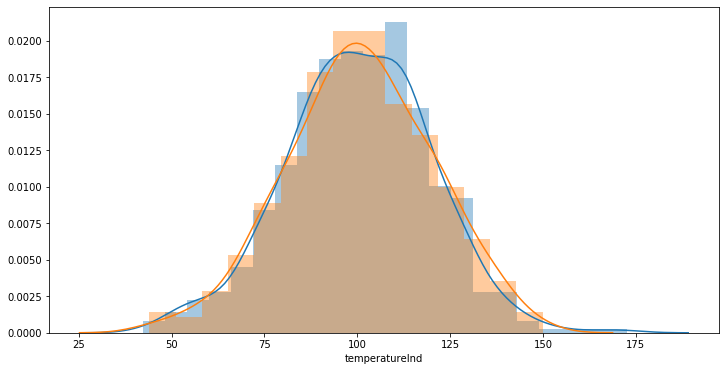

In [35]:
# Numeric vs Categorical
# temperatureInd vs broken
plt.figure(figsize=(12,6))
sns.distplot(df.temperatureInd[df.broken==0])
sns.distplot(df.temperatureInd[df.broken==1])
plt.show()

In [ ]:
# Statistically speaking, a histogram is a non-parametric estimation and its shape reflects the distribution of data.
# Since broken and not broken distribution are quite similar.
# Therefore, we can assume temperature is not the factor that affect the machine.

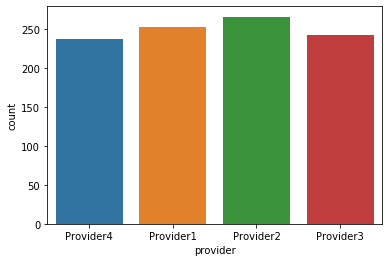

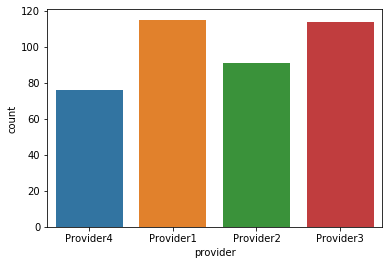

In [50]:

# Categorical vs Categorical
# provider vs broken
plt.figure(figsize=(6,4))
sns.countplot(df.provider,order=df.provider.unique())
plt.show()
sns.countplot(df.provider[df.broken==1],order=df.provider.unique())
plt.show()

In [ ]:
# We can classify from the above countplot that which provider is providing malfunctioned machines
# machine provide by provider 1 & 3 are having more likely to breakdown, than provider 2 & 4

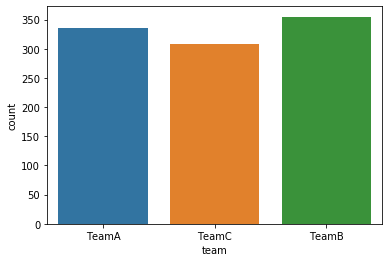

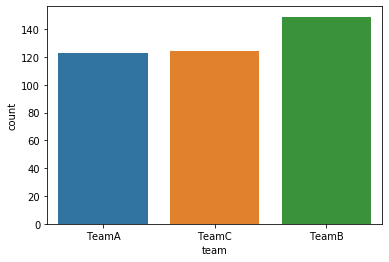

In [48]:
# Categorical vs Categorical
# team vs broken
plt.figure(figsize=(6,4))
sns.countplot(df.team,order=df.team.unique())
plt.show()
sns.countplot(df.team[df.broken==1],order=df.team.unique())
plt.show()


In [ ]:
# From the above countplot we can assume that machine wear and tear for all the team are same only

<Figure size 432x288 with 0 Axes>

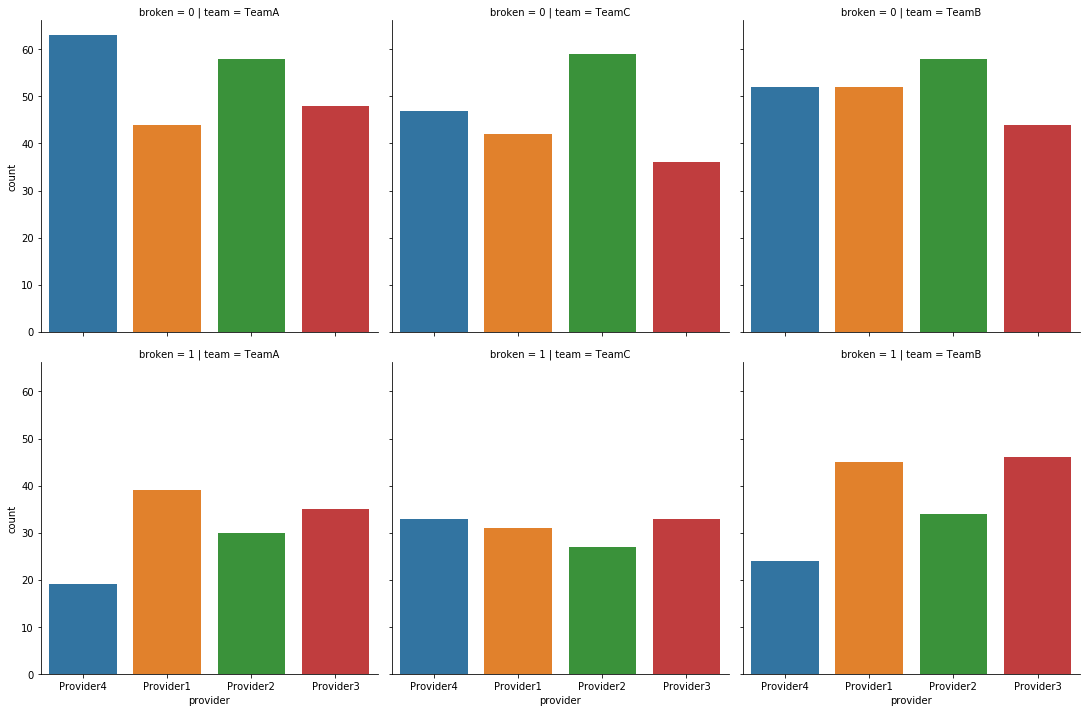

In [53]:
#categorical,categorical v/s categorical
#provider v/s broken,team v/s broken
plt.figure(figsize=(6,4))
sns.catplot(x='provider',col='team',row='broken',kind='count',data=df)
plt.show()

## 1. Through bivariate analysis we can infer that moisture is one of the prime causes of machine breakdown.

## 2. Machine after 50 month of service are inclined to get effected

## 3. Machine provided by provider 1 & provider 3 are damaged more.

In [41]:
df.describe()

,lifetime,broken,pressureInd,moistureInd,temperatureInd
count,999.000000,999.000000,999.000000,999.000000,999.000000
mean,55.170170,0.396396,98.691175,110.042272,100.556912
std,26.474343,0.489394,19.849985,25.614438,19.572120
min,1.000000,0.000000,33.481917,70.928815,42.279598
25%,34.000000,0.000000,85.570155,94.529427,87.675306
50%,60.000000,0.000000,97.527069,102.841390,100.553499
75%,80.000000,1.000000,112.229013,113.437037,113.519436
max,93.000000,1.000000,173.282541,199.138717,172.544140


# Multivariate Scope for Analysis

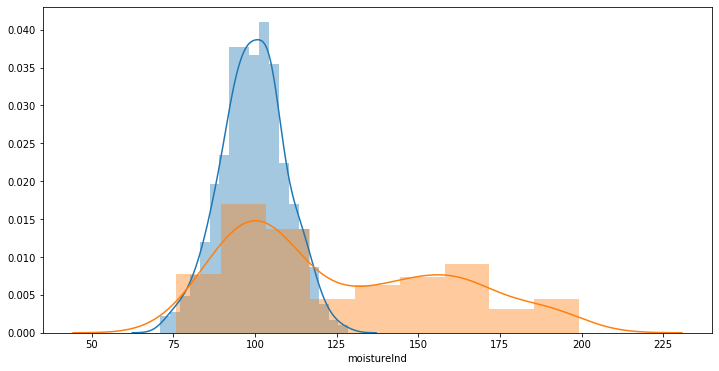

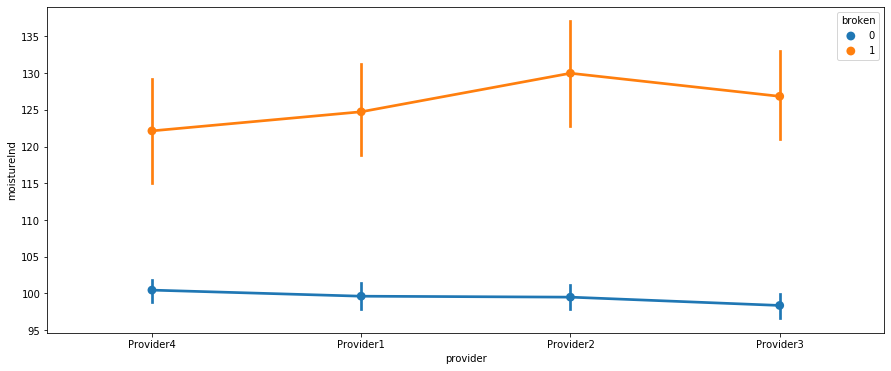

In [45]:
# Point Plot
# Categorical vs Numeric vs Categorical
# x, y, hue >> x = Categorical, y = Numeric, hue = Categorical
plt.figure(figsize=(15,6))
sns.pointplot(x='provider',y='moistureInd',hue='broken',data=df)
plt.show()

In [ ]:
# Machines provided by provider 4 is least likely to be damaged by moisture
# Machines provided by provider 2 is more likely to be damaged by moisture

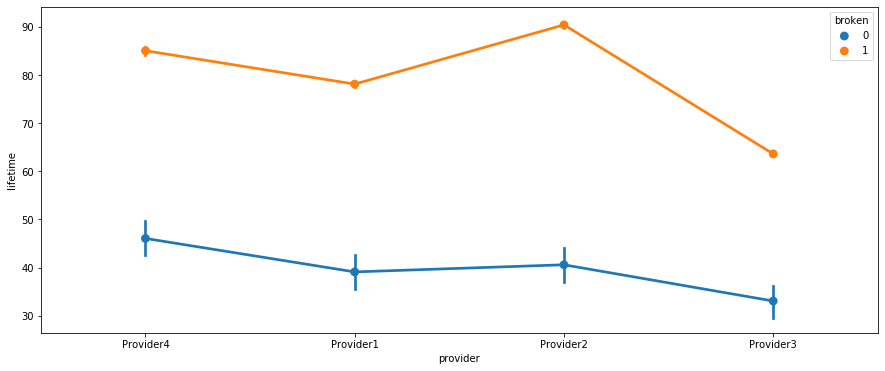

In [44]:
# Categorical vs Categorical vs Categorical
# x, y, hue >> x = Categorical, y = Categorical, hue = Categorical
plt.figure(figsize=(15,6))
sns.pointplot(x='provider',y='lifetime',hue='broken',data=df)
plt.show()

In [ ]:
# Machines provided by provider 2 is least likely to have more lifetime.
# Machines provided by provider 4>1>3 are more likely to have lesser lifetime in the in decreasing order

<Figure size 864x360 with 0 Axes>

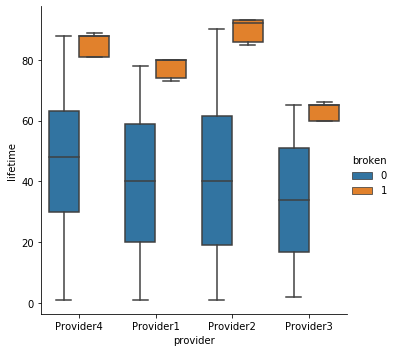

In [22]:
# catplot
# Categorical vs Numeric vs Categorical
# x, y, hue >> x = Categorical, y = Numeric, hue = Categorical
plt.figure(figsize=(12,5))
sns.catplot(x="provider", y="lifetime", hue="broken", kind="box", data=df)
plt.show()

In [23]:
# From the above catplot we can see that
# Machines provided by provider 1 & provider 3 starts getting broken from 60 & 75 months onwards respectively.

## 1. Through multivariate analysis we can infer that life time of machine provide by provider 1 & 3 is less.

## 2. Also machine provided by them are less resistive from moisture.

# Correlational Data Analysis

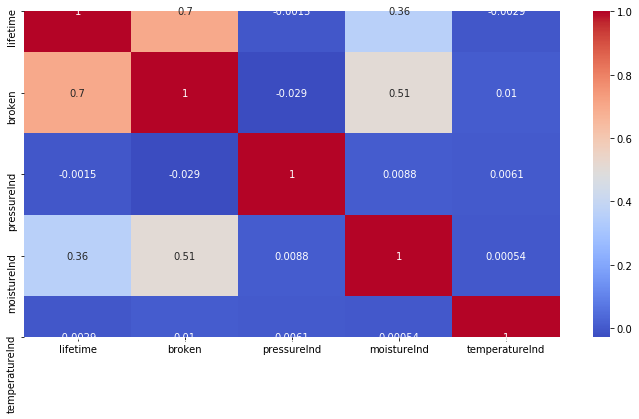

In [26]:
cor = df.corr()
# Heatmap for visualizing correlation analysis
plt.figure(figsize=(12,6))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [27]:
# From correlation analysis, we can see that broken is related to moistureInd
# And moistureInd is related to lifetime
# So, we can find a relation between lifetime and broken through moistureInd

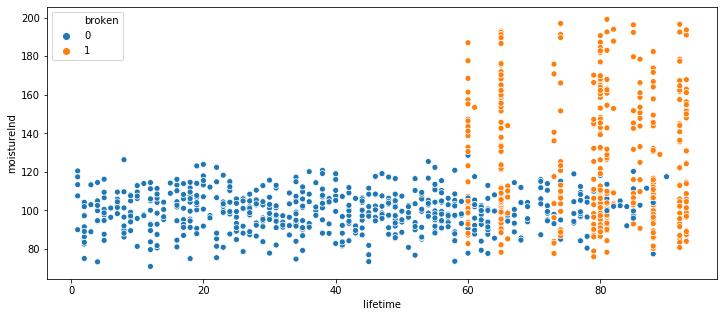

In [28]:
# numeric vs numeric vs categorical
# creditscore vs age vs exited
plt.figure(figsize=(12,5))
sns.scatterplot(x = 'lifetime', y = 'moistureInd', hue = 'broken', data=df)
plt.show()

In [29]:
# From the above scatterplot we can assume that machine after sevice of 60 months, starts gettingeffected from moistures
# and it get broken

# Conclusion

#### 1. Machine after life period more than 60 months are more prone to moistures i.e. Resistance against moisture is reduce


#### 2. Due to getting effected from mositure the machine start rusting and in the end it got broken.

#### 3. The machines provided by provider 1 and provider 3 have less resistivity from moisture.

#### 4. Machine provided by provider 2 are more resistive to mositure and it have a longer life time.